In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [4]:
data = pd.read_csv(r'F:\cga\桌面\dataset\creditcard_fraud_detection\creditcard.csv')

In [5]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283721,171823.0,1.850363,-0.641588,-1.305172,0.263061,1.651034,4.228471,-1.349456,1.162268,1.012739,0.150302,-0.213996,0.403785,0.044469,-0.025141,1.089147,0.510850,-0.870418,0.156155,-0.818556,-0.098314,0.079511,0.206796,0.285683,0.660314,-0.313416,-0.732554,0.092040,-0.020500,39.25,0
4925,4471.0,-0.533006,0.283427,2.356547,1.408757,0.277727,-0.299107,0.070633,-0.225735,1.475306,-0.557315,0.216947,-2.002564,2.494157,0.758006,-0.636463,-0.634055,0.639527,0.421592,0.364400,0.234730,0.074499,0.764469,-0.109889,0.391850,-0.285294,-0.292475,0.013314,-0.043734,23.87,0
127566,78378.0,1.187916,-1.614355,1.380604,-1.278969,-2.360653,-0.219696,-1.638079,0.086688,-1.619028,1.487235,1.433049,0.216510,1.295005,-0.683927,0.383602,0.316747,-0.006579,1.071463,-0.488124,-0.026839,0.214983,0.795717,-0.094975,0.560743,0.128940,-0.085179,0.063613,0.050997,124.62,0
211132,138275.0,1.825974,-0.859024,-0.936391,0.023266,-0.401073,0.140728,-0.513345,0.251438,1.446612,-0.076801,-0.025822,-0.116604,-2.407913,0.573881,-0.371215,0.318378,-0.525322,0.290657,0.819942,-0.144302,-0.364727,-1.243885,0.365144,0.177146,-0.558606,-0.440111,-0.041079,-0.037002,96.98,0
155086,104451.0,1.994181,0.071555,-1.665668,0.794873,0.326190,-0.506307,-0.241071,-0.055641,2.030576,-0.843586,1.863196,-2.429688,0.106564,0.176065,-1.679897,0.358300,1.785115,1.126508,-0.029365,-0.264773,-0.147970,-0.002202,0.090400,0.598328,0.007021,0.548294,-0.084973,-0.041665,6.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
data[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


Distribution of Normal(0) and Fraud(1)
0    284315
1       492
Name: Class, dtype: int64


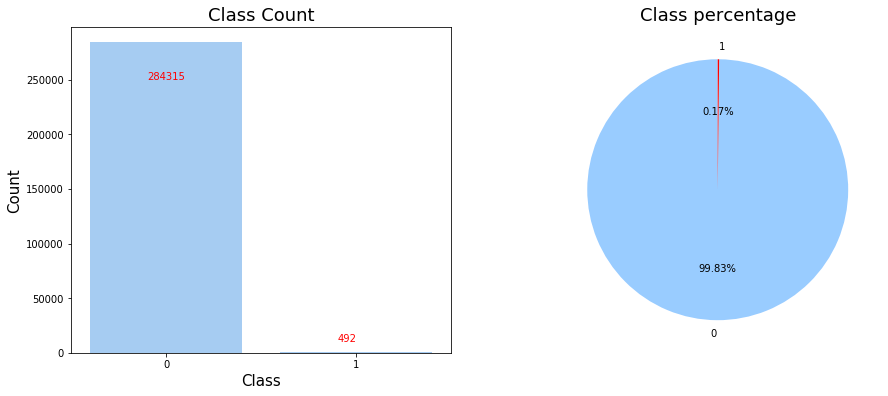

In [148]:
print('Distribution of Normal(0) and Fraud(1)')
print(data['Class'].value_counts())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(data['Class'], ax=ax1, color='#99CCFF')
ax1.set_title('Class Count', fontsize=18)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_xlabel('Class', fontsize=15)
ax1.text(0-0.1, 250000, len(data[data['Class'] == 0]), color='r')
ax1.text(1-0.1, 10000, data['Class'].sum(), color='r')

ax2.pie(data['Class'].value_counts(normalize=True), startangle=90, labels=[0, 1], autopct='%.2f%%', colors=['#99CCFF', 'r'])
ax2.set_title('Class percentage', fontsize=18)
plt.show()

In [27]:
timedelta = pd.to_timedelta(data['Time'], unit='s')
data['Hour'] = timedelta.dt.components.hours.astype(int)
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
183128,125667.0,-2.492266,-1.317518,2.180041,3.034086,2.507252,1.954548,-0.040476,0.428613,-0.511146,1.116039,-0.293335,-0.908334,-1.200847,-0.556609,0.490138,-0.240719,0.125786,-1.711609,-3.285568,-0.566850,0.138836,1.303109,1.313559,-0.278596,-0.225260,0.077824,-0.362126,-0.037462,10.59,0,10
255205,157116.0,1.706345,-1.321375,-2.718076,-0.172084,-0.188303,-1.643995,0.877192,-0.686419,-1.009719,0.937548,-1.214975,-0.830333,-1.099351,0.988843,-0.173331,-2.238806,0.300879,0.730222,-0.795299,-0.148217,0.054553,0.116705,-0.327011,-0.027107,0.354823,1.000911,-0.179572,-0.046644,290.96,0,19
59320,48790.0,1.246367,-0.818360,-0.615706,-0.678617,-0.251785,-0.187017,0.001629,-0.305584,-0.890780,0.529638,-1.795023,0.114917,1.558479,-0.260298,-0.049059,-1.424884,-0.255802,0.939263,0.013917,-0.109303,-0.447125,-0.921864,-0.309404,-0.919183,0.609885,1.160227,-0.088509,0.009632,140.79,0,13
234753,148095.0,-0.304726,1.023302,-0.129371,-0.556443,0.047241,-1.067858,0.589584,0.306799,-0.055494,-0.617410,-1.262533,-0.254723,-0.948965,0.634844,-0.276783,0.040059,-0.151040,-0.647788,-0.128391,-0.206817,-0.225813,-0.655953,0.149538,-0.120574,-0.503016,0.153568,0.116022,0.032461,9.67,0,17
51801,45125.0,-0.615243,1.236025,1.269848,-0.205427,0.213022,-0.633465,0.704190,-0.059510,-0.267253,-0.017641,-0.709791,0.148421,0.778115,-0.088897,0.828222,0.291298,-0.620380,-0.287900,0.168343,0.278282,-0.284563,-0.655615,-0.086797,-0.119073,-0.054976,0.104719,0.377144,0.178032,0.99,0,12


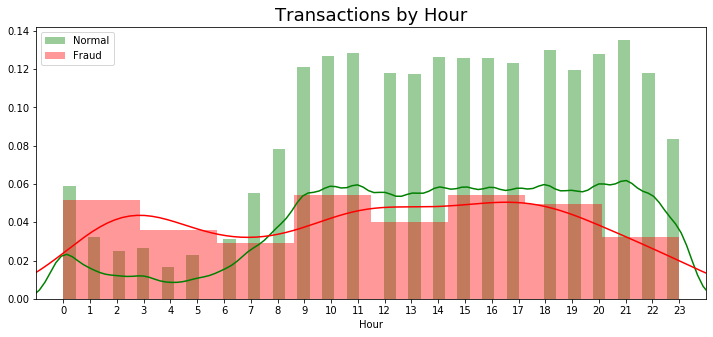

In [129]:
# Exploring the distribution by Class through the Hour
plt.figure(figsize=(12, 5))
sns.distplot(data[data['Class'] == 0]['Hour'], label='Normal', color='g')
sns.distplot(data[data['Class'] == 1]['Hour'], label='Fraud', color='r')
plt.title('Transactions by Hour', fontsize=18)
plt.xlim([-1, 24])
plt.xticks(range(0, 24))
plt.legend(loc='upper left')
plt.show()

In [38]:
# Amount
print('Fraud transactions statistics:'.center(50, '-'))
print(data[data['Class'] == 1]['Amount'].describe())
print('Normal transactions statistics:'.center(50, '-'))
print(data[data['Class'] == 0]['Amount'].describe())

----------Fraud transactions statistics:----------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
---------Normal transactions statistics:----------
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [40]:
data['Amount_log'] = np.log(data['Amount'] + 0.01)
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Amount_log
59190,48736.0,-0.433751,1.094602,2.430667,3.049268,-0.312896,0.659010,-0.030665,0.320157,-0.736692,0.680201,-0.435884,0.090684,0.305388,-0.357147,0.466481,-0.710820,0.640901,-0.360079,0.405452,0.237965,0.192780,0.940025,-0.115464,0.456663,-0.391548,0.354472,0.455177,0.222041,4.95,0,13,1.601406
157207,109705.0,-2.118002,-1.089025,3.427940,4.944065,2.214912,3.467411,-2.519864,1.147043,1.336100,1.318243,0.607856,-2.532393,0.946647,0.294516,-1.378123,-0.932912,1.696120,0.158650,0.936407,0.016094,-0.148069,0.712401,-0.616011,-0.928545,-0.098941,0.698852,0.406954,-0.162308,15.89,0,6,2.766319
169320,119636.0,-0.196837,1.259138,-0.942893,-0.104683,0.412376,-1.361477,0.657757,0.086589,-0.160096,-1.119070,-0.832480,-0.350326,-0.278619,-0.569907,0.706868,0.236606,0.645586,0.864420,-0.126555,-0.248591,0.350678,0.947681,-0.170210,-0.190223,-0.369862,-0.159612,-0.112360,0.059452,13.98,0,9,2.638343
123354,76892.0,-1.386725,1.067763,1.822499,-0.682421,-0.377616,-0.680118,0.282821,0.430088,0.150079,-0.372859,0.815234,-0.052907,-1.856886,0.456167,-0.495423,1.259566,-1.290635,0.642667,-1.868734,-0.333179,0.060073,0.011975,-0.091141,0.443813,-0.236341,-0.925158,-0.202221,-0.115952,6.99,0,21,1.945910
205139,135608.0,-2.722997,-2.071490,-1.628408,0.771412,3.764228,-2.228476,-0.268701,-0.879517,1.292591,0.481403,1.527620,0.780814,0.215337,-2.734636,-0.877786,0.029165,1.030458,0.840817,0.638080,-1.520781,-0.520292,0.559455,-0.892006,0.763877,-1.932933,-0.685773,0.091153,0.660883,91.22,0,13,4.513384


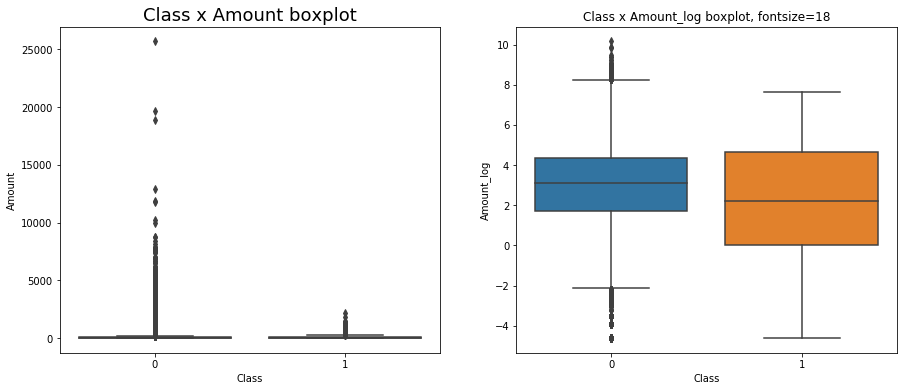

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='Class', y='Amount', data=data, ax=ax1)
ax1.set_title('Class x Amount boxplot', fontsize=18)
sns.boxplot(x='Class', y='Amount_log', data=data, ax=ax2)
ax2.set_title('Class x Amount_log boxplot, fontsize=18')

plt.show()

<Figure size 1440x432 with 0 Axes>

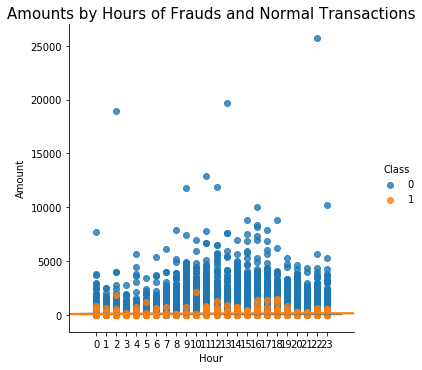

In [150]:
# Looking the Amount and time distribution of Fraud transactions
plt.figure(figsize=(20, 6))
sns.lmplot(x='Hour', y='Amount', data=data, hue='Class')
plt.title('Amounts by Hours of Frauds and Normal Transactions', fontsize=15)
plt.xticks(range(0, 24))
plt.show()

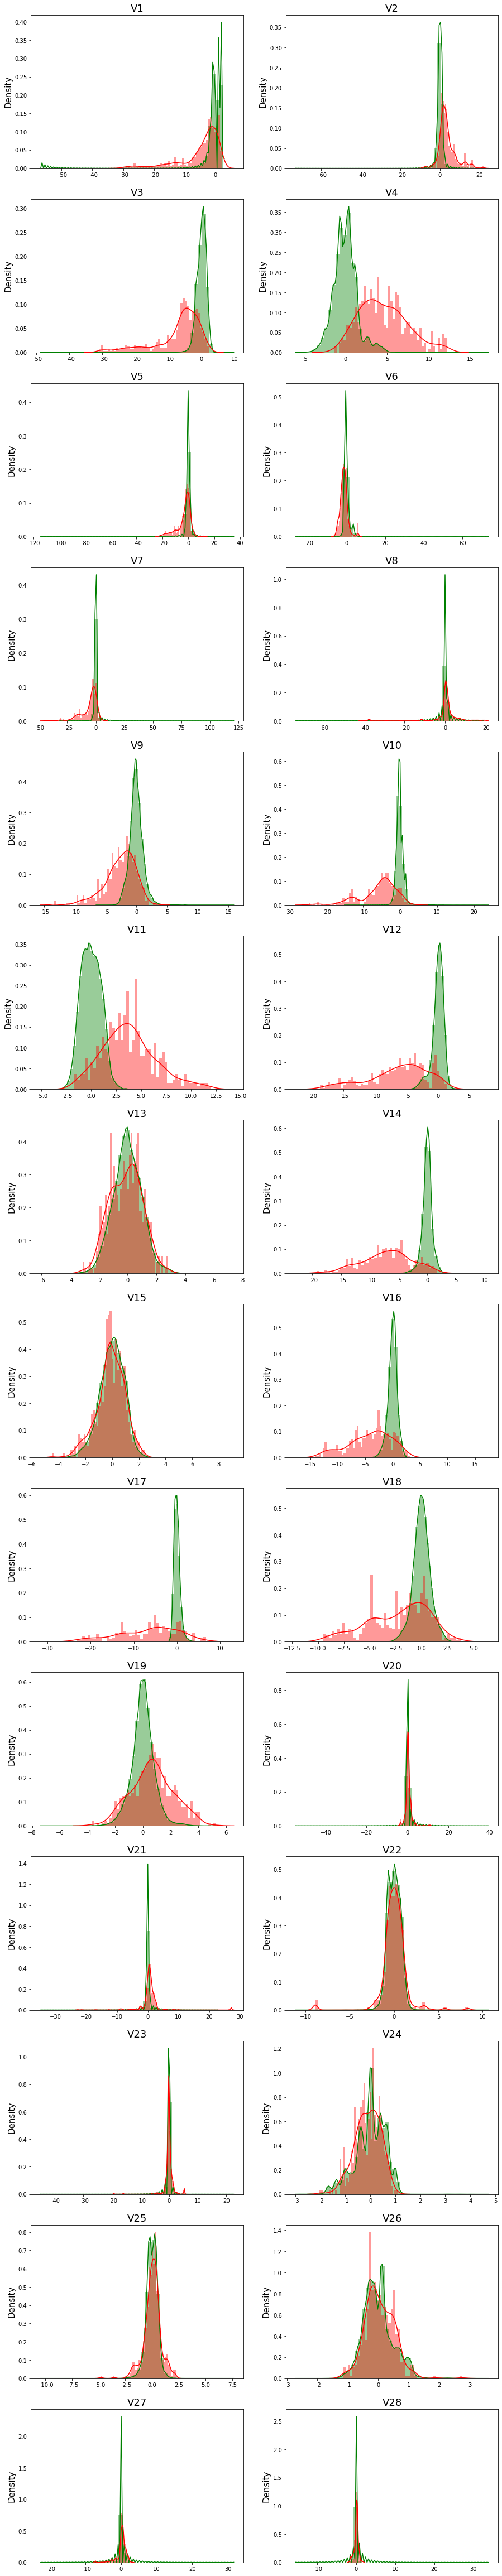

In [60]:
# Looking the V's features
columns = data.columns[data.columns.str.contains('V')]
grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15, 14 * 6))
for idx, col in enumerate(columns):
    ax = plt.subplot(grid[idx])
    sns.distplot(data[data['Class'] == 0][col], color='g', bins=50)
    sns.distplot(data[data['Class'] == 1][col], color='r', bins=50)
    ax.set_title(col, fontsize=18)
    ax.set_ylabel('Density', fontsize=15)
    ax.set_xlabel('')
plt.show()

In [61]:
data2 = data[['V1',"V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","Amount_log",'Hour',"Class"]]
data2.sample(5)

,V1,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount_log,Hour,Class
174876,-1.112399,-0.841724,-0.017257,-1.464624,-1.523826,0.035357,-1.581783,-0.990695,0.578060,-1.921798,-0.029990,0.843706,-1.201163,3.949511,9,0
118409,1.099850,-0.532924,0.067324,0.059593,-1.226648,0.809750,1.640765,0.599741,0.589778,-2.392791,0.665961,0.044172,-2.346449,3.390473,20,0
244673,1.732997,-0.485557,-1.183249,1.039508,0.900072,-0.471349,0.853422,1.494212,-1.565617,-0.147030,0.818640,0.531216,0.195284,4.744062,18,0
108553,1.094867,-0.243102,-0.088014,0.000614,-0.094271,0.025898,1.460021,0.297377,0.862421,0.010561,-0.107657,-0.422916,0.009993,4.276249,19,0
9467,-0.970215,1.062558,0.784792,0.614614,0.830841,-0.173168,-0.083306,-2.801151,1.115588,0.902029,-0.319180,0.681144,-1.304556,2.717340,3,0


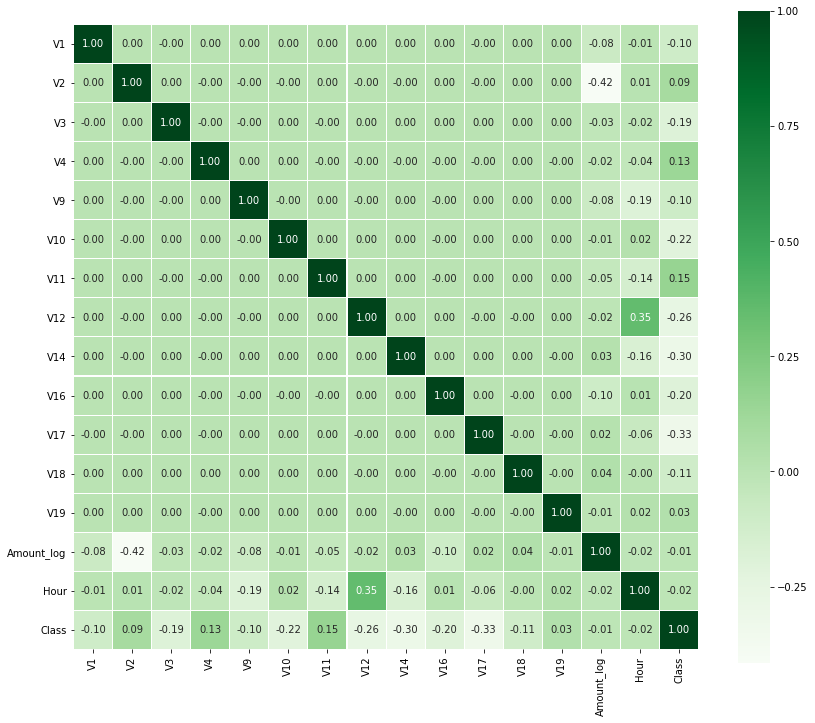

In [70]:
# Coef of Correlations between features
colormap = plt.cm.Greens
plt.figure(figsize=(14, 12))
sns.heatmap(data2.corr(), cmap=colormap, linewidth=.1, linecolor='w', annot=True, square=True, fmt='.2f')
plt.show()

In [102]:
# Preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score, fbeta_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

In [74]:
X = data2.drop('Class', axis=1).values
y = data2['Class'].values

In [93]:
# 模型评价指标
def model_eval(headline, y_test, y_pred, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    p, r, _ = precision_recall_curve(y_test, y_pred_proba)
    print('acc:', accuracy_score(y_test, y_pred))
    print('ks:', max(tpr - fpr))
    print('roc_auc:', auc(fpr, tpr))
    print('precision:', precision_score(y_test, y_pred))
    print('recall:', recall_score(y_test, y_pred))
    print('pr_auc:', auc(r, p))
    print('f2:', fbeta_score(y_test, y_pred, beta=2))
    return

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [89]:
# Random Forest Model
RF = RandomForestClassifier
smote_pipeline = make_pipeline_imb(SMOTE(random_state=2), RF(random_state=2))
smote_mode = smote_pipeline.fit(X_train, y_train)
smote_pred = smote_pipeline.predict(X_test)
smote_pred_proba = smote_pipeline.predict_proba(X_test)[:, 1]

print('data distribution:', Counter(y))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print('smote data distribution:', Counter(y_smote))

C:\Users\zhaokunfeng\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


data distribution: Counter({0: 284315, 1: 492})
smote data distribution: Counter({0: 284315, 1: 284315})


In [94]:
# Evaluate the model + Random Forest
print('Confusion Matrix:')
print(confusion_matrix(y_test, smote_pred))
print('\nSmote Pipeline Score:\n', smote_pipeline.score(X_test, y_test))
model_eval('\n Smote + Random Forest Classification Report:\n', y_test, smote_pred, smote_pred_proba)

Confusion Matrix:
[[85291    18]
 [   24   110]]

Smote Pipeline Score:
 0.9995084442259752
acc: 0.9995084442259752
ks: 0.8693703994066871
roc_auc: 0.9458514114536741
precision: 0.859375
recall: 0.8208955223880597
pr_auc: 0.8304643439154041
f2: 0.8283132530120482


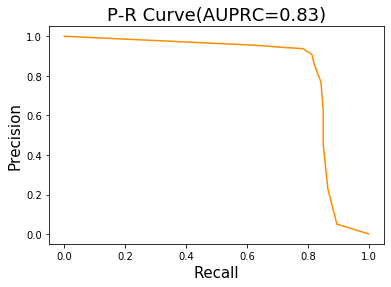

In [101]:
# Precision-Recall Curve
p, r, _ = precision_recall_curve(y_test, smote_pred_proba)
plt.figure()
plt.plot(r, p, color='darkorange')
plt.title('P-R Curve' + '(AUPRC=%.2f)' % auc(r, p), fontsize=18)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.show()

In [104]:
# Tune parameter
param_grid = {'max_depth': [3, 5, None], 'max_features': ['auto', 5, 6, 7, 8]}
model = RandomForestClassifier(n_estimators=50, n_jobs=-1)
grid_search = GridSearchCV(model, cv=5, param_grid=param_grid, scoring='recall')
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)


0.7878712629714919
{'max_depth': None, 'max_features': 8}


In [108]:
# Final Model
final_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_features=8)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]
model_eval('model eval:', y_test, y_pred, y_pred_proba)

acc: 0.999602073897218
ks: 0.8696763110329561
roc_auc: 0.9357841896263679
precision: 0.9385964912280702
recall: 0.7985074626865671
pr_auc: 0.8536087631643777
f2: 0.8230769230769232


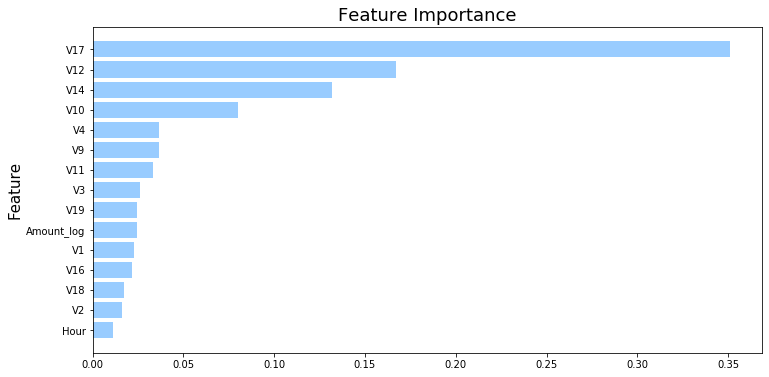

In [116]:
# Features importance visualization
columns = data2.columns.values[:-1]
fea_imp = final_model.feature_importances_
sorted_idx = np.argsort(fea_imp)
plt.figure(figsize=(12, 6))
plt.barh(columns[sorted_idx], np.sort(fea_imp), color='#99CCFF')
# plt.yticklabels(sorted_idx)
plt.ylabel('Feature', fontsize=15)
plt.title('Feature Importance', fontsize=18)
plt.show()

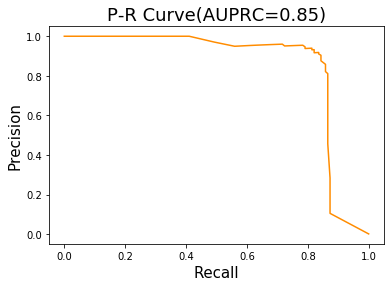

In [117]:
# Precision-Recall Curve
p, r, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(r, p, color='darkorange')
plt.title('P-R Curve' + '(AUPRC=%.2f)' % auc(r, p), fontsize=18)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.show()

In [119]:
results = cross_val_score(final_model, X_train, y_train, cv=5, scoring='recall')
print('recall_mean:%.3f,recall_std:%.3f' % (results.mean(), results.std()))

recall_mean:0.777,recall_std:0.041


In [161]:
# Modelling LogisticRegression with hyper parameters
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'class_weight': [{0:1, 1:1}, {0:1, 1:5}, {0:1, 1:100}, {0:1, 1:10000}]}
LR = LogisticRegression(random_state=2)
grid_search = GridSearchCV(LR, param_grid=param_grid, cv=5, scoring='')
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.974960542757581
{'C': 0.1, 'class_weight': {0: 1, 1: 10000}, 'penalty': 'l1'}


In [164]:
final_lr = LogisticRegression(C=1, penalty='l1', class_weight={0:1, 1:10})
final_lr.fit(X_train, y_train)
results = cross_val_score(final_lr, X_train, y_train, cv=5, scoring='recall')
print('cross_val_score,mean:%.2f,std:%.2f' % (results.mean(), results.std()))
y_pred = final_lr.predict(X_test)
y_pred_proba = final_lr.predict_proba(X_test)[:, 1]
model_eval('lr model eval:', y_test, y_pred, y_pred_proba)
print(confusion_matrix(y_test, y_pred))

cross_val_score,mean:0.81,std:0.04
acc: 0.9993562960102056
ks: 0.8769279999328167
roc_auc: 0.9807817166147367
precision: 0.7724137931034483
recall: 0.835820895522388
pr_auc: 0.7648607374293842
f2: 0.8223201174743024
[[85276    33]
 [   22   112]]


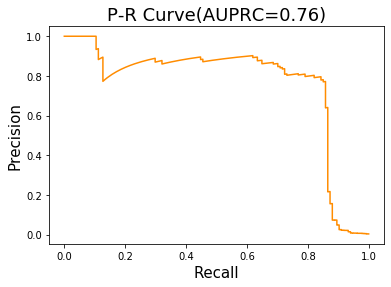

In [126]:
# Precision-Recall Curve
p, r, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(r, p, color='darkorange')
plt.title('P-R Curve' + '(AUPRC=%.2f)' % auc(r, p), fontsize=18)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.show()